##### Proportional Deposit

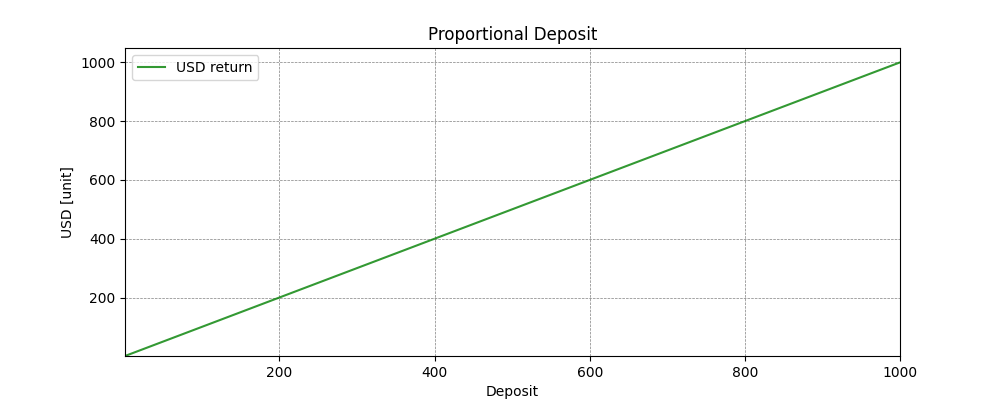

In [1]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0)

%matplotlib widget
deposits = list(range(1, 1_000, 1))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: pool.proportional_deposit(amount, deepcopy(state))[0], deposits
                )), 
                color='green', 
                label='USD return', 
                alpha=0.8
               )
ax.legend(loc='upper left')
ax.set_title('Proportional Deposit')
ax.set_ylabel('USD [unit]')
ax.set_xlabel('Deposit')
ax.set_ylim(ymin=1)
ax.set_xlim(xmin=1, xmax=1_000)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

##### Deposit

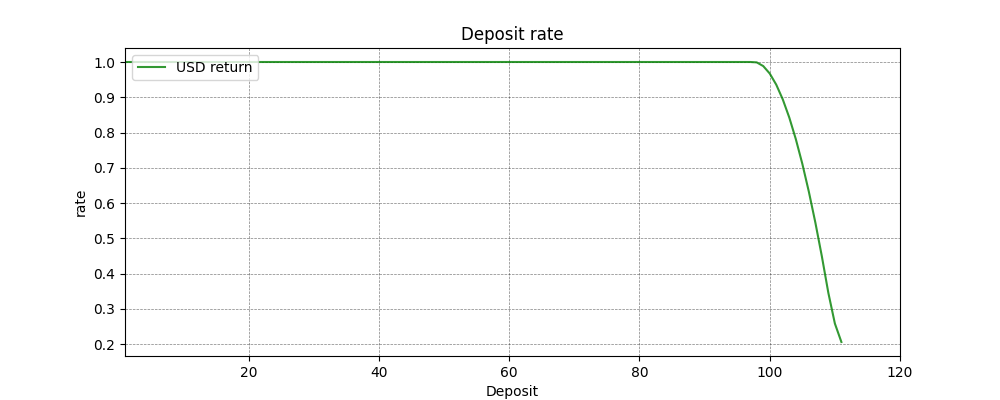

In [2]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0)
pool.proportional_deposit(1_000, state)

%matplotlib widget
deposits = list(range(1, 112, 1))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: pool.deposit([0, 0, amount, 0], deepcopy(state)) / amount, deposits
                )), 
                color='green', 
                label='USD return', 
                alpha=0.8
               )
ax.legend(loc='upper left')
ax.set_title('Deposit rate')
ax.set_ylabel('rate')
ax.set_xlabel('Deposit')
ax.set_xlim(xmin=1, xmax=120)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

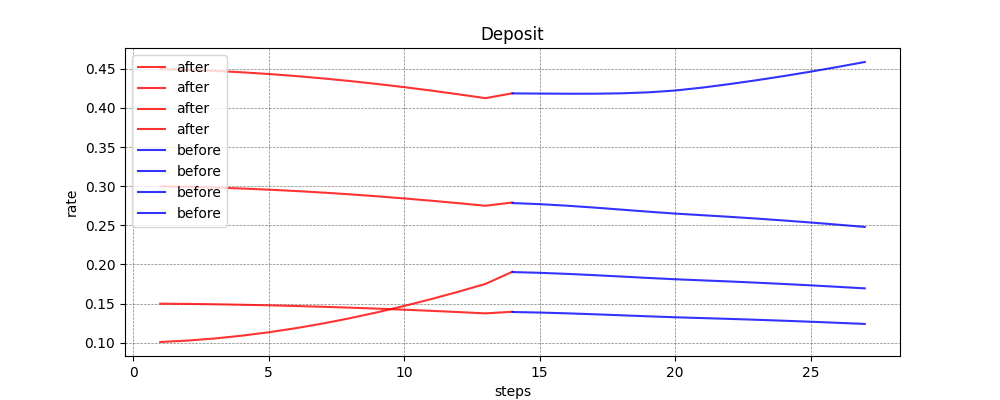

In [3]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0)
pool.proportional_deposit(1_000, state)

%matplotlib widget
deposits = list(range(1, 15, 1))

def assets_rate(amounts: [int], state: pool.PoolState):
    pool.deposit(amounts, state)
    return state.assets_balances[0] / state.total_supply, state.assets_balances[1] / state.total_supply, state.assets_balances[2] / state.total_supply, state.assets_balances[3] / state.total_supply

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: assets_rate([0, 0, amount, 0], state), deposits
                )), 
                color='red', 
                label='after', 
                alpha=0.8
               )
ax.plot(list(map(lambda d: d + 13, deposits)), 
                list(map(
                    lambda amount: assets_rate([amount, 0, 0, 0], state), deposits
                )), 
                color='blue', 
                label='before', 
                alpha=0.8
               )
ax.legend(loc='upper left')
ax.set_title('Deposit')
ax.set_ylabel('rate')
ax.set_xlabel('steps')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

In [4]:
import pool
import importlib
from copy import deepcopy
from functools import reduce
importlib.reload(pool)

weights = [0.5, 0.5]
state = pool.create(weights=weights, max_allocation=0.8, weight_amplitude=0.65, slippage_rate=2, fee_max=10000000, fee_base=0)
pool.proportional_deposit(200, state)

total_lp_1 = reduce(lambda acc, amount: pool.deposit([amount, 0], state) + acc, range(1, 40, 1))
total_lp_2 = reduce(lambda acc, amount: pool.deposit([0, amount], state) + acc, range(1, 40, 1))
lp_diff = (total_lp_1 + total_lp_2) - sum(range(1, 40, 1)) * 2
assert (0.001 > lp_diff > 0), f"lp diff:{lp_diff}"
print(lp_diff)

2.2737367544323206e-13


PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0, assets_balances=[450.0, 150.0, 211.0, 300.0], assets_total_supply=1111.0, total_supply=1022.8400000000004)
PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0, assets_balances=[450.0, 150.0, 100.0, 300.0], assets_total_supply=1000.0, total_supply=1000.0)


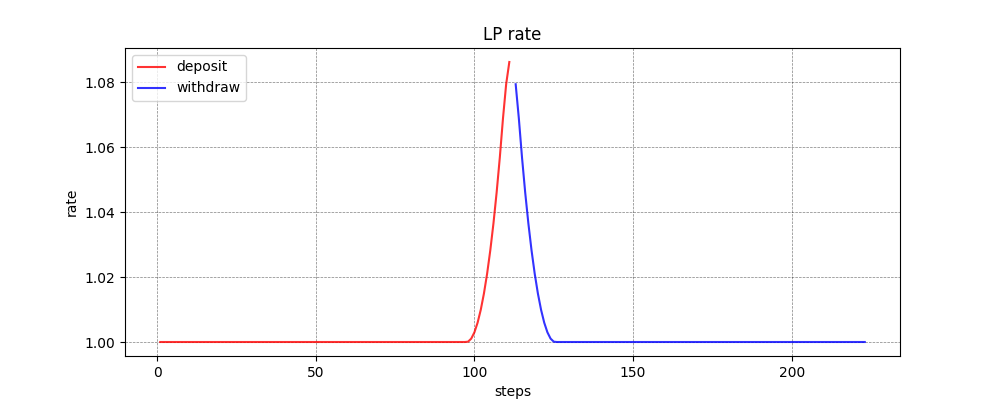

In [5]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0)
pool.proportional_deposit(1_000, state)

%matplotlib widget
deposits = list(range(1, 112, 1))

def deposit_rate(amounts: [int], state: pool.PoolState):
    a = pool.deposit(amounts, state)
    return state.assets_total_supply / state.total_supply

def withdraw_rate(amounts: [int], state: pool.PoolState):
    a = pool.withdraw(amounts, state)
    return state.assets_total_supply / state.total_supply

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: deposit_rate([0, 0, 1, 0], state), deposits
                )),
                color='red', 
                label='deposit', 
                alpha=0.8
               )
print(state)
ax.plot(list(map(lambda i: i + 112, deposits)), 
                list(map(
                    lambda amount: withdraw_rate([0, 0, 1, 0], state), deposits
                )),
                color='blue', 
                label='withdraw', 
                alpha=0.8
               )
print(state)
ax.legend(loc='upper left')
ax.set_title('LP rate')
ax.set_ylabel('rate')
ax.set_xlabel('steps')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0, assets_balances=[450.0, 150.0, 100.0, 300.0], assets_total_supply=1000.0, total_supply=1000)


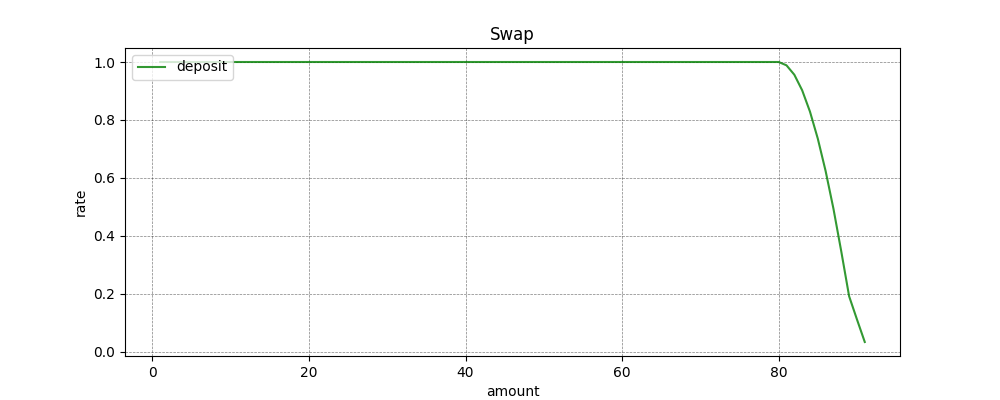

In [6]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0)
pool.proportional_deposit(1_000, state)

%matplotlib widget
deposits = list(range(1, 92, 1))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: pool.swap(0, 2, amount, deepcopy(state)) / amount, deposits
                )),
                color='green', 
                label='deposit', 
                alpha=0.8
               )
print(state)
ax.legend(loc='upper left')
ax.set_title('Swap')
ax.set_ylabel('rate')
ax.set_xlabel('amount')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

In [7]:
import pool
import importlib
from copy import deepcopy
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0)
pool.proportional_deposit(1_000, state)

print(state)
print(pool.swap(0, 2, 91, state))
print(state)
print(pool.swap(2, 0, 91, state))
print(state)

PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0, assets_balances=[450.0, 150.0, 100.0, 300.0], assets_total_supply=1000.0, total_supply=1000)
3.0000000000000284
PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0, assets_balances=[541.0, 150.0, 96.99999999999997, 300.0], assets_total_supply=1088.0, total_supply=1000)
91
PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0, assets_balances=[450.0, 150.0, 187.99999999999997, 300.0], assets_total_supply=1088.0, total_supply=1000)


0.45625


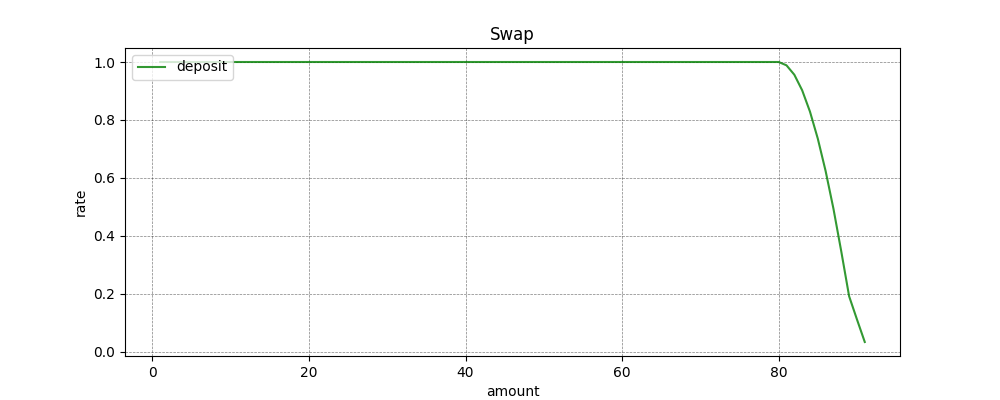

In [8]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=90, fee_max=8, fee_base=0)
pool.proportional_deposit(1_000, state)

volume = state.assets_total_supply * 0.5
print(volume * 0.0005 / (state.assets_total_supply * 0.2) * 365)

%matplotlib widget
deposits = list(range(1, 92, 1))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: pool.swap(0, 2, amount, deepcopy(state)) / amount, deposits
                )),
                color='green', 
                label='deposit', 
                alpha=0.8
               )
ax.legend(loc='upper left')
ax.set_title('Swap')
ax.set_ylabel('rate')
ax.set_xlabel('amount')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

In [9]:
import pool
import importlib
from copy import deepcopy
importlib.reload(pool)

weights = [0.5, 0.5]
state = pool.create(weights=weights, max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0)
pool.proportional_deposit(100, state)
state.weights = [0.4, 0.4, 0.2]
append_amount = state.assets_total_supply * 0.2 / 0.8
state.assets_total_supply += append_amount
state.assets_balances.append(append_amount)
print(pool.calculate_fee(state))
print(state)
print(pool.swap(1, 0, 10, state))
print(state)
print(pool.swap(0, 1, 10, state))
print(state)

0
PoolState(weights=[0.4, 0.4, 0.2], max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0, assets_balances=[50.0, 50.0, 25.0], assets_total_supply=125.0, total_supply=100)
10
PoolState(weights=[0.4, 0.4, 0.2], max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0, assets_balances=[40.0, 60.0, 25.0], assets_total_supply=125.0, total_supply=100)
10
PoolState(weights=[0.4, 0.4, 0.2], max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0, assets_balances=[50.0, 50.0, 25.0], assets_total_supply=125.0, total_supply=100)
